In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
dataset=pd.read_csv('/Users/rishi/Desktop/projects/insurance.csv')

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 600x600 with 0 Axes>

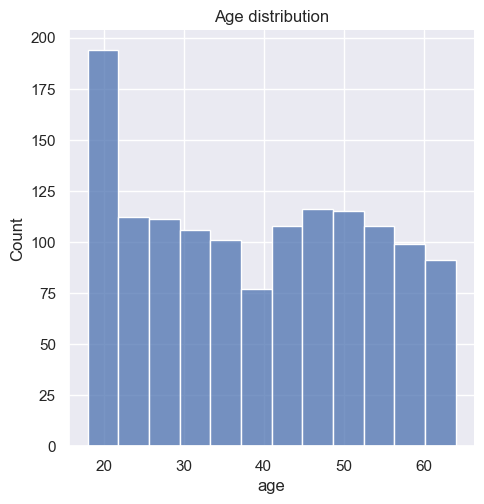

In [6]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(dataset['age'])
plt.title('Age distribution')
plt.show

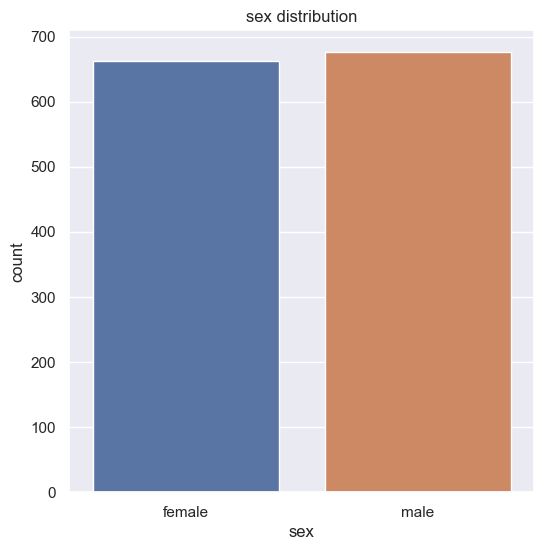

In [7]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=dataset)
plt.title("sex distribution")
plt.show()

<Figure size 600x600 with 0 Axes>

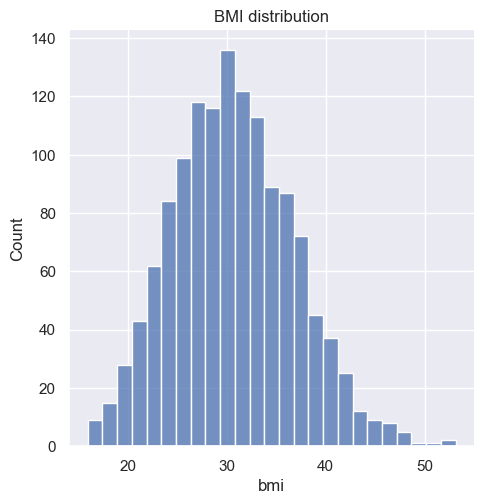

In [8]:
plt.figure(figsize=(6,6))
sns.displot(dataset['bmi'])
plt.title('BMI distribution')
plt.show()

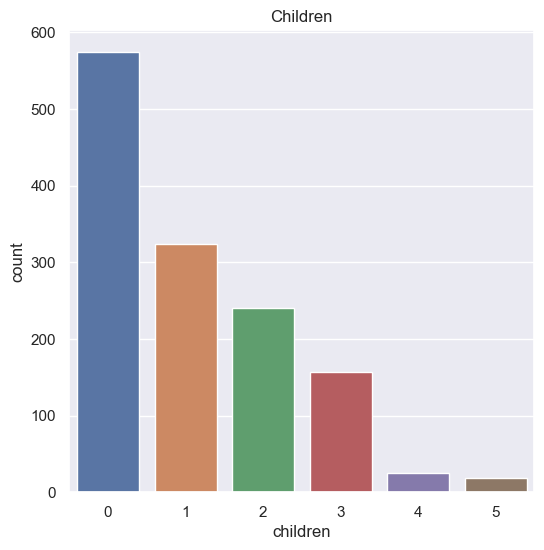

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=dataset)
plt.title("Children")
plt.show()

In [10]:
dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

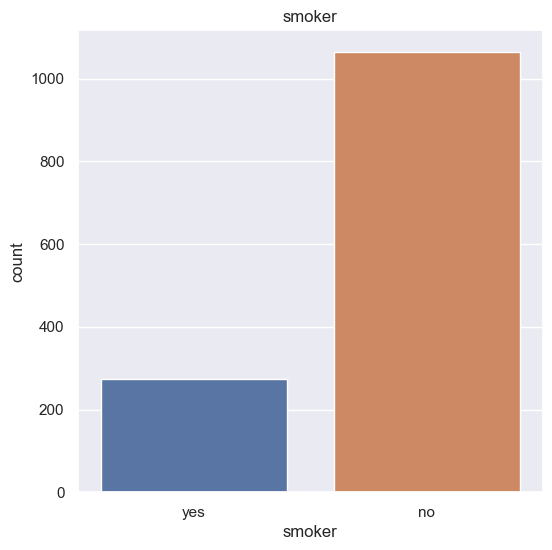

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=dataset)
plt.title("smoker")
plt.show()

In [12]:
dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

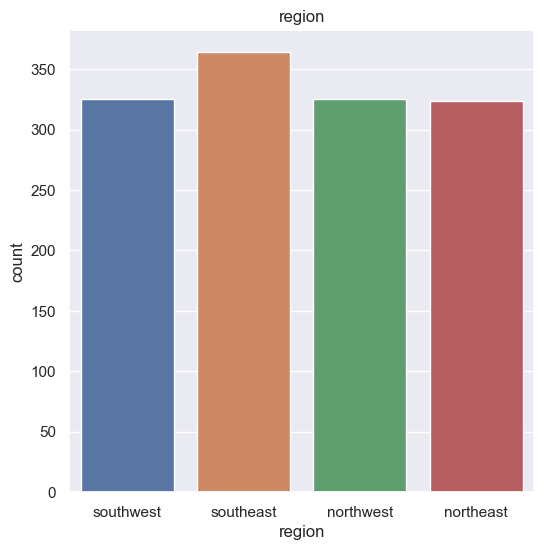

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=dataset)
plt.title("region")
plt.show()

In [14]:
dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 600x600 with 0 Axes>

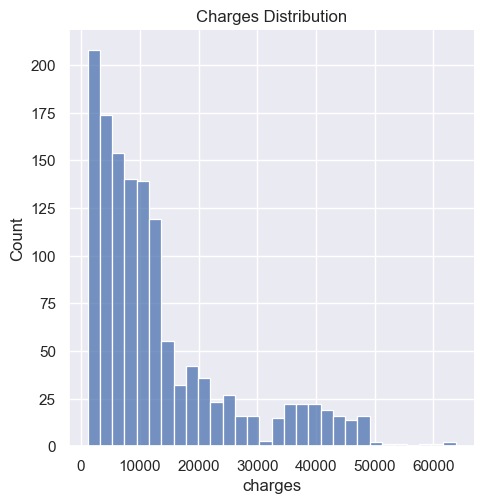

In [15]:
plt.figure(figsize=(6,6))
sns.displot(dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [16]:
dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [17]:
X=dataset.drop(columns='charges',axis=1)
Y=dataset['charges']

In [18]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [19]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
print(X.shape, X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [23]:
regressor=LinearRegression()

In [24]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [25]:
training_data_prediction=regressor.predict(X_train)

In [26]:
r2_train=metrics.r2_score(Y_train, training_data_prediction)
print("R squared value: ",r2_train)

R squared value:  0.751505643411174


In [27]:
test_data_prediction=regressor.predict(X_test)

In [28]:
r2_test=metrics.r2_score(Y_test, test_data_prediction)
print("R squared value: ",r2_test)

R squared value:  0.7447273869684077


In [29]:
input_data=(31,1,25.74,0,1,0)
input_data_numpy=np.asarray(input_data)
input_data_reshaped=input_data_numpy.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)
print(prediction)

[3760.0805765]


/Users/rishi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
